# Analysis of Final Models

## Setup

In [2]:
import optuna
import pandas as pd
import matplotlib.pyplot as plt

import utils

In [12]:
# load the summary metrics
metrics = pd.concat(
    [
        pd.read_csv("data/models/eval/metrics/pls.csv"),
        pd.read_csv("data/models/eval/metrics/ann.csv"),
        pd.read_csv("data/models/eval/metrics/cnn.csv"),
        
    ],
    ignore_index=True
)
metrics["model_type"] = metrics["model"].str.split("_").str[0]
metrics

,Unnamed: 0,n,r2,rmse,sep,bias,rpd,model,test_set,query,model_type
0,0,68009,0.868267,0.893129,0.893030,-1.369625e-02,2.755516,pls,training,"partition in ('train', 'validation')",pls
1,1,54341,0.871640,0.887483,0.887491,3.012625e-16,2.791163,pls,training_calibration,"partition in ('train', 'validation') and train...",pls
2,2,13668,0.853907,0.915232,0.912724,-6.814957e-02,2.623573,pls,training_tuning,"partition in ('train', 'validation') and train...",pls
3,3,2996,0.859358,0.927524,0.926521,-4.632827e-02,2.669842,pls,holdout,partition == 'holdout',pls
4,4,2594,0.853244,0.926685,0.923474,-7.917445e-02,2.619954,pls,season 2020,season == 2020,pls
...,...,...,...,...,...,...,...,...,...,...,...
121,55,54341,0.945763,0.576888,0.576286,2.646164e-02,4.298442,cnn_rs10,training_calibration,"partition in ('train', 'validation') and train...",cnn
122,56,13668,0.928569,0.639971,0.639503,-2.507822e-02,3.744466,cnn_rs10,training_tuning,"partition in ('train', 'validation') and train...",cnn
123,57,2996,0.716010,1.318014,1.277074,-3.267830e-01,1.936978,cnn_rs10,holdout,partition == 'holdout',cnn
124,58,2594,0.706580,1.310326,1.247720,-4.009359e-01,1.939105,cnn_rs10,season 2020,season == 2020,cnn


In [4]:
metrics.query("model_type == 'ann' and test_set == 'training_tuning'").sort_values(["rmse"])

,Unnamed: 0,n,r2,rmse,sep,bias,rpd,model,test_set,query,model_type
62,56,13668,0.925101,0.655324,0.654717,-0.028735,3.657454,ann_rs10,training_tuning,"partition in ('train', 'validation') and train...",ann
32,26,13668,0.925046,0.655562,0.654668,-0.034677,3.657730,ann_rs5,training_tuning,"partition in ('train', 'validation') and train...",ann
20,14,13668,0.924933,0.656055,0.655224,-0.033469,3.654623,ann_rs3,training_tuning,"partition in ('train', 'validation') and train...",ann
56,50,13668,0.924735,0.656921,0.656262,-0.029946,3.648842,ann_rs9,training_tuning,"partition in ('train', 'validation') and train...",ann
50,44,13668,0.924375,0.658492,0.657794,-0.030835,3.640347,ann_rs8,training_tuning,"partition in ('train', 'validation') and train...",ann
26,20,13668,0.924123,0.659586,0.658947,-0.029572,3.633978,ann_rs4,training_tuning,"partition in ('train', 'validation') and train...",ann
14,8,13668,0.923594,0.661884,0.661757,-0.014127,3.618546,ann_rs2,training_tuning,"partition in ('train', 'validation') and train...",ann
44,38,13668,0.923555,0.662049,0.661155,-0.034854,3.621839,ann_rs7,training_tuning,"partition in ('train', 'validation') and train...",ann
38,32,13668,0.923485,0.662353,0.660754,-0.046343,3.624038,ann_rs6,training_tuning,"partition in ('train', 'validation') and train...",ann
8,2,13668,0.922892,0.664916,0.663975,-0.035815,3.606461,ann_rs1,training_tuning,"partition in ('train', 'validation') and train...",ann


In [5]:
df_summary = metrics.groupby(["model_type", "test_set", "n"]).agg({
    "r2": ["count", "mean"],
    "rmse": ["mean", "min", "max", "std"],
    "sep": "mean",
    "bias": "mean",
    "rpd": "mean"
}).reset_index()
df_summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_summary.columns.values]
df_summary.rename(columns={"r2_count": "count"}, inplace=True)
df_summary

,model_type,test_set,n,count,r2_mean,rmse_mean,rmse_min,rmse_max,rmse_std,sep_mean,bias_mean,rpd_mean
0,ann,holdout,2996,10,0.742644,1.253886,1.190398,1.327533,0.047277,1.220766,1.403551e-01,2.030656
1,ann,season 2020,2594,10,0.756096,1.193291,1.114809,1.306507,0.060235,1.163481,6.878618e-02,2.086339
2,ann,season 2021,402,10,0.567625,1.582590,1.404889,1.790202,0.142998,1.454246,6.021701e-01,1.667465
3,ann,training,68009,10,0.937865,0.613380,0.609533,0.618765,0.003467,0.613235,1.054509e-02,4.012860
4,ann,training_calibration,54341,10,0.941079,0.601273,0.597262,0.607332,0.003727,0.600841,2.120523e-02,4.122904
5,ann,training_tuning,13668,10,0.924184,0.659314,0.655324,0.664916,0.003363,0.658525,-3.183731e-02,3.636386
6,cnn,holdout,2996,10,0.694169,1.361180,1.169004,1.596464,0.141233,1.280858,-4.154579e-01,1.937871
7,cnn,season 2020,2594,10,0.679933,1.359707,1.137717,1.624910,0.163567,1.258244,-4.769501e-01,1.931519
8,cnn,season 2021,402,10,0.681744,1.361299,1.260807,1.476228,0.066251,1.344787,-1.866489e-02,1.800685
9,cnn,training,68009,10,0.942214,0.591509,0.582992,0.599756,0.005047,0.591074,1.397068e-02,4.163448


In [6]:
df_summary

,model_type,test_set,n,count,r2_mean,rmse_mean,rmse_min,rmse_max,rmse_std,sep_mean,bias_mean,rpd_mean
0,ann,holdout,2996,10,0.742644,1.253886,1.190398,1.327533,0.047277,1.220766,1.403551e-01,2.030656
1,ann,season 2020,2594,10,0.756096,1.193291,1.114809,1.306507,0.060235,1.163481,6.878618e-02,2.086339
2,ann,season 2021,402,10,0.567625,1.582590,1.404889,1.790202,0.142998,1.454246,6.021701e-01,1.667465
3,ann,training,68009,10,0.937865,0.613380,0.609533,0.618765,0.003467,0.613235,1.054509e-02,4.012860
4,ann,training_calibration,54341,10,0.941079,0.601273,0.597262,0.607332,0.003727,0.600841,2.120523e-02,4.122904
5,ann,training_tuning,13668,10,0.924184,0.659314,0.655324,0.664916,0.003363,0.658525,-3.183731e-02,3.636386
6,cnn,holdout,2996,10,0.694169,1.361180,1.169004,1.596464,0.141233,1.280858,-4.154579e-01,1.937871
7,cnn,season 2020,2594,10,0.679933,1.359707,1.137717,1.624910,0.163567,1.258244,-4.769501e-01,1.931519
8,cnn,season 2021,402,10,0.681744,1.361299,1.260807,1.476228,0.066251,1.344787,-1.866489e-02,1.800685
9,cnn,training,68009,10,0.942214,0.591509,0.582992,0.599756,0.005047,0.591074,1.397068e-02,4.163448


## Plot model predictions

In [7]:
predictions = {
    "cnn": pd.read_pickle(f"data/models/eval/predict/cnn_rs2.pkl"), # best rmse on the tuning set
    "ann": pd.read_pickle(f"data/models/eval/predict/ann_rs10.pkl"), # best rmse on the tuning set
    "pls": pd.read_pickle(f"data/models/eval/predict/pls.pkl"),
}

In [8]:
predictions["pls"].query("subsequent_flag_1 == 1")

,partition,train_partition,sample_order,subsequent_flag_1,partition_ext,origin,population,date,season,region,...,969_snv_savgol_d2,972_snv_savgol_d2,975_snv_savgol_d2,978_snv_savgol_d2,981_snv_savgol_d2,984_snv_savgol_d2,987_snv_savgol_d2,990_snv_savgol_d2,y_true,y_pred


In [9]:
test_sets = {
    # "training": "partition in ('train', 'validation')",
    # "training_calibration": "partition in ('train', 'validation') and train_partition == 'calibration'",
    "training_tuning": "partition in ('train', 'validation') and train_partition == 'tunning'",
    "holdout": "partition == 'holdout'",
    # "season 2020": "season == 2020",
    # "season 2021": "season == 2021",
    
}

all_metrics = []
for model in ["cnn", "ann", "pls"]:
    for test_set, query in test_sets.items():
        test_partition = predictions[model].query(query)
        metrics = utils.calculate_metrics(
            y_true=test_partition["y_true"], 
            y_pred=test_partition["y_pred"]
        )
        metrics["model"] = model
        metrics["test_set"] = test_set
        metrics["query"] = query
        all_metrics.append(metrics)

metrics = pd.DataFrame(all_metrics)
# metrics.to_csv(f"data/{STUDY_NAME}/models/eval/metrics/{model_name}.csv")
metrics

,n,r2,rmse,sep,bias,rpd,model,test_set,query
0,13668,0.929338,0.636516,0.636477,-0.008936,3.762270,cnn,training_tuning,"partition in ('train', 'validation') and train..."
1,2996,0.693242,1.369828,1.278299,-0.492877,1.935122,cnn,holdout,partition == 'holdout'
2,13668,0.925101,0.655324,0.654717,-0.028735,3.657454,ann,training_tuning,"partition in ('train', 'validation') and train..."
3,2996,0.748463,1.240421,1.203367,0.301719,2.055619,ann,holdout,partition == 'holdout'
4,13668,0.853907,0.915232,0.912724,-0.068150,2.623573,pls,training_tuning,"partition in ('train', 'validation') and train..."
5,2996,0.859358,0.927524,0.926521,-0.046328,2.669842,pls,holdout,partition == 'holdout'


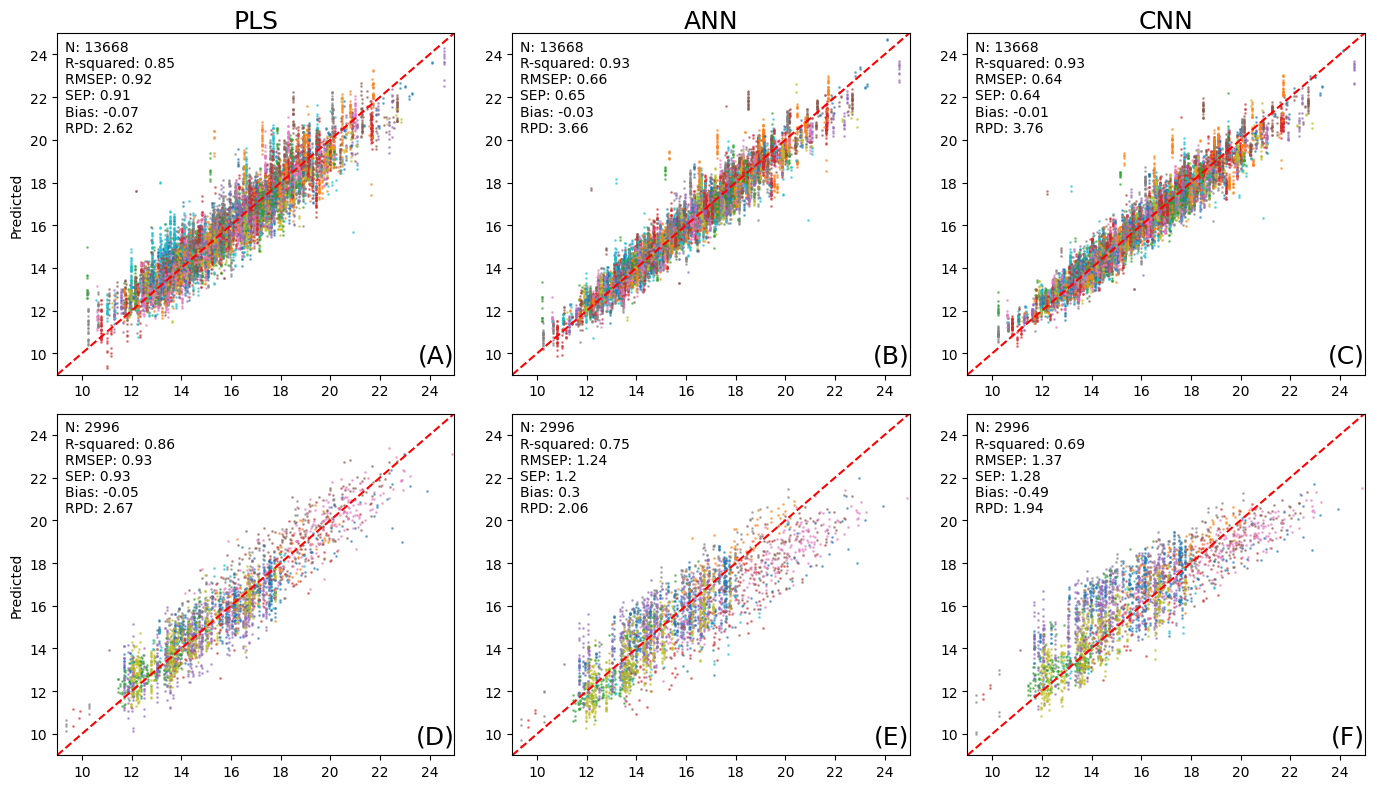

In [10]:
# create a figure with subplots - 4 rows (one for each query) and 3 columns (one for each model)
# plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('default')
fig, axes = plt.subplots(len(test_sets), 3, figsize=(14, 4*len(test_sets)))

# global min and max for axis scaling
global_min, global_max = 9, 25
test_sets


for i, (key, query) in enumerate(test_sets.items()):
    models = {
        "PLS": predictions["pls"].query(query),
        "ANN": predictions["ann"].query(query),
        "CNN": predictions["cnn"].query(query),
    }
    
    # calculate metrics for each model
    metrics = {}
    for model_name, data in models.items():
        metrics[model_name] = utils.calculate_metrics(
            y_true=models[model_name]["y_true"], 
            y_pred=models[model_name]["y_pred"]
        )
    stats = {}
    for model_name, metric in metrics.items():
        stats[model_name] = f"N: {metric['n']}\nR-squared: {round(metric['r2'], 2)}\nRMSEP: {round(metric['rmse'], 2)}\nSEP: {round(metric['sep'], 2)}\nBias: {round(metric['bias'], 2)}\nRPD: {round(metric['rpd'], 2)}"
    
    # plotting
    for j, (model_name, data) in enumerate(models.items()):
        ax = axes[i, j] if len(test_sets) > 1 else axes[j]  # Handle indexing for axes
        
        # generate color mapping for populations
        unique_populations = data["population"].unique()
        for population in unique_populations:
            data_p = data[data["population"] == population]
            ax.scatter(data_p["y_true"], data_p["y_pred"], s=1, alpha=0.5)
        ax.plot([global_min, global_max], [global_min, global_max], linestyle='--', color='red')
        
        if j in [0]: 
            ax.set_ylabel("Predicted")
            
        if i in [0]: 
            ax.set_title(model_name, fontsize=18, pad=-2)
            
        if i == len(test_sets.items()) + 1: 
            # Only set xlabel for the bottom subplot
            ax.set_xlabel("Reference")
        
        ax.text(0.02, 0.98, stats[model_name], transform=ax.transAxes, fontsize=10, ha='left', va='top')
        title_label = chr(65 + i*3 + j)
        ax.text(1.0, 0.02, f"({title_label})", transform=ax.transAxes, fontsize=18, ha='right', va='bottom') 
        
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)
        


plt.tight_layout()
plt.show()


AttributeError: 'dict' object has no attribute 'query'

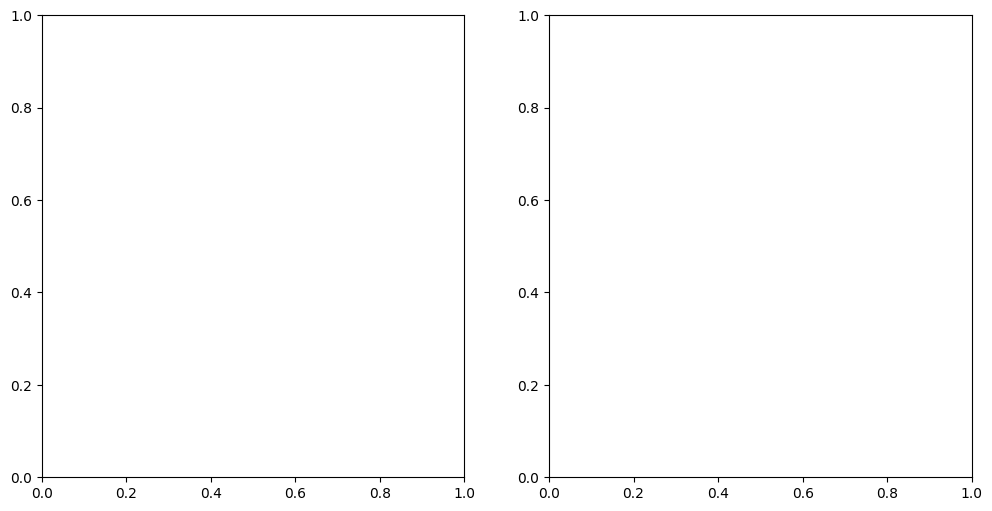

In [11]:


fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Two plots in one row

# First plot
df = metrics.copy().query("test_set == 'training_tuning'")
# df.sort_values("model_type", inplace=True)
axs[0].boxplot(
    [df['rmse'][df['model_type'] == category] for category in df['model_type'].unique()],
    labels=df['model_type'].str.upper().unique(),
    patch_artist=True,
    whis=100
)
axs[0].set_xlabel("Model")
axs[0].set_ylabel("RMSE (%FW)")
axs[0].set_ylim(0.6, 1)
axs[0].grid(False)

# Second plot
df = metrics.copy().query("test_set == 'holdout'")
# df.sort_values("model_type", inplace=True)
axs[1].boxplot(
    [df['rmse'][df['model_type'] == category] for category in df['model_type'].unique()],
    labels=df['model_type'].str.upper().unique(),
    patch_artist=True,
    whis=100
)
axs[1].set_xlabel("Model")
axs[1].set_ylim(0.9, 1.7)
axs[1].grid(False)

axs[0].text(0.03, 0.97, '(A)', transform=axs[0].transAxes, fontsize=18, verticalalignment='top')
axs[1].text(0.03, 0.97, '(B)', transform=axs[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
plt.show()

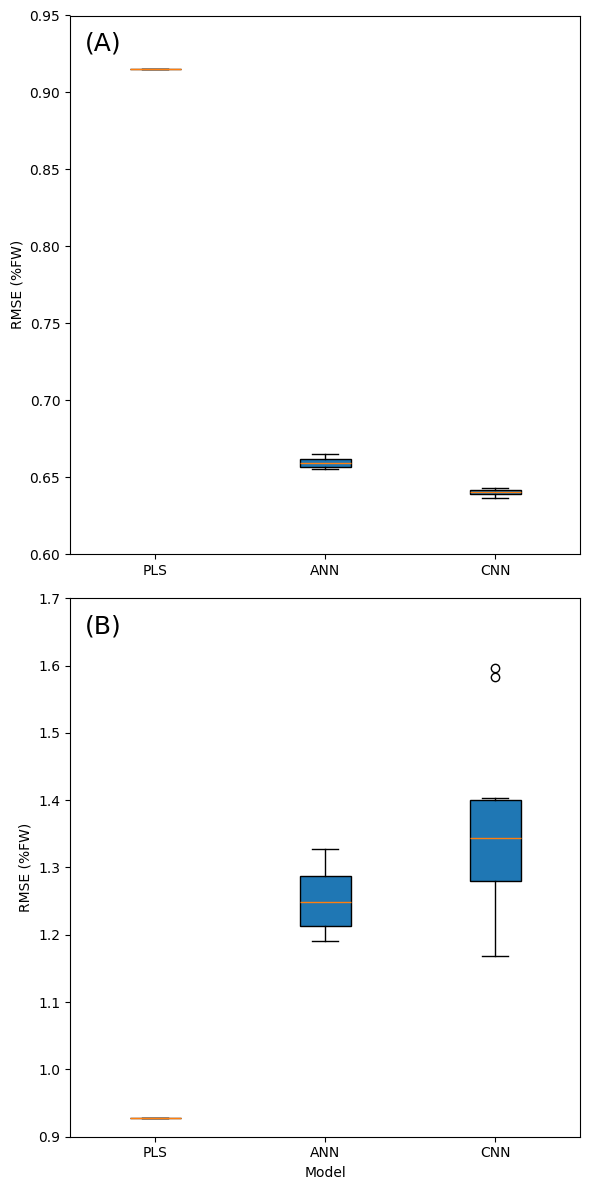

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(6, 12))  # Two plots in one column

# First plot
df = metrics.copy().query("test_set == 'training_tuning'")
axs[0].boxplot(
    [df['rmse'][df['model_type'] == category] for category in df['model_type'].unique()],
    labels=df['model_type'].str.upper().unique(),
    patch_artist=True,
    # whis=100
)
# axs[0].set_xlabel("Model")
axs[0].set_ylabel("RMSE (%FW)")
axs[0].set_ylim(0.6, 0.95)
axs[0].grid(False)

# Second plot
df = metrics.copy().query("test_set == 'holdout'")
axs[1].boxplot(
    [df['rmse'][df['model_type'] == category] for category in df['model_type'].unique()],
    labels=df['model_type'].str.upper().unique(),
    patch_artist=True,
    # whis=100
)
axs[1].set_xlabel("Model")
axs[1].set_ylabel("RMSE (%FW)")
axs[1].set_ylim(0.9, 1.7)
axs[1].grid(False)

axs[0].text(0.03, 0.97, '(A)', transform=axs[0].transAxes, fontsize=18, verticalalignment='top')
axs[1].text(0.03, 0.97, '(B)', transform=axs[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
plt.show()
